## 3.11　結果評価


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1

In [2]:
import torch
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
from torchviz import make_dot
from IPython.display import display

In [3]:
%matplotlib inline

In [4]:
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

x = sampleData1[:, 0]
y = sampleData1[:, 1]

X = x - x.mean()
Y = y - y.mean()

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

def pred(X):
  return W * X + B

Yp = pred(X)

def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

loss = mse(Yp, Y)

loss.backward()

lr = 0.001

with torch.no_grad():
  W -= lr * W.grad
  B -= lr * B.grad

  W.grad.zero_()
  B.grad.zero_()

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001
history = np.zeros((0, 2))

for epoch in range(num_epochs):
  Yp = pred(X)
  loss = mse(Yp, Y)

  loss.backward()

  with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

    W.grad.zero_()
    B.grad.zero_()

  if (epoch % 10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))

In [5]:
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

print(f'初期状態: 損失: {history[0, 1]:.4f}')
print(f'最終状態: 損失: {history[-1, 1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態: 損失: 13.3520
最終状態: 損失: 4.6796


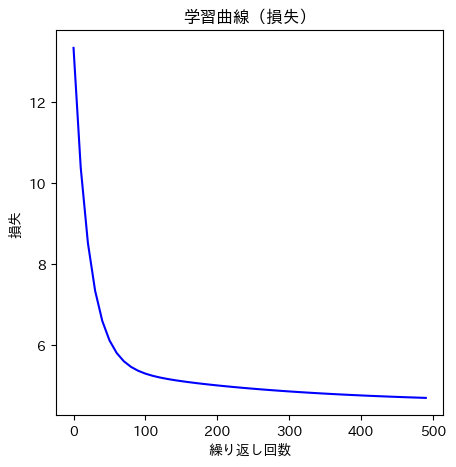

In [6]:
plt.figure(figsize=(5, 5))
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.show()

In [7]:
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


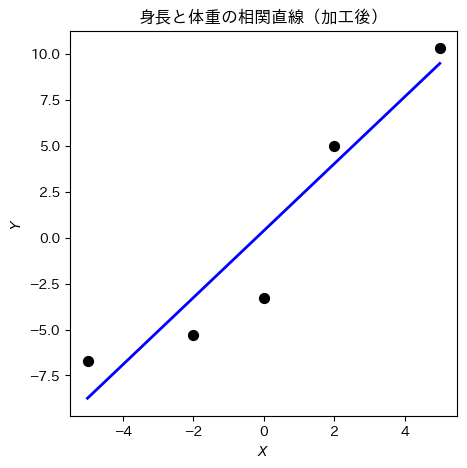

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線（加工後）')
plt.show()

In [9]:
x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

[]

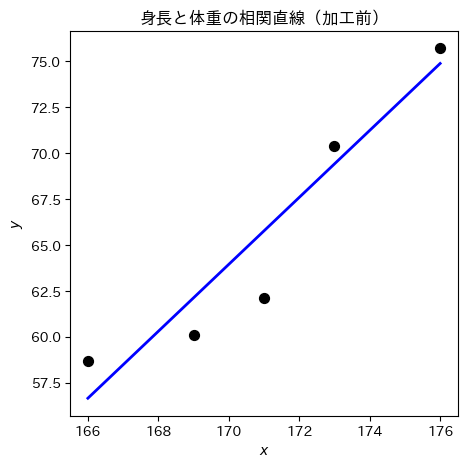

In [10]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線（加工前）')
plt.plot()